# `2.3 a) Trees`

1. (SMOTE) 'Synthetic Minority Over-sampling Technique' class balancing 
1. Modeling
    - a) Decision Tree 
    - b) Random Forest
    - c) (XGBoost) Extreme Gradient Boosting 

## 2.3.0 Libraries and constants

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Paths
TRAIN_SET_PATH  = 'data/processed-data/2-fayaad-2-train_processed.csv'
TEST_SET_PATH   = 'data/processed-data/2-fayaad-2-test_processed.csv'

# Constants
TRAIN_SET_DF = pd.read_csv(TRAIN_SET_PATH)
TEST_SET_DF  = pd.read_csv(TEST_SET_PATH)

TARGET_COLUMN = 'T1 - Is good credit'

Y_TRAIN, X_TRAIN = TRAIN_SET_DF[TARGET_COLUMN], TRAIN_SET_DF.drop(columns=[TARGET_COLUMN])
Y_TEST,  X_TEST  = TEST_SET_DF[TARGET_COLUMN],  TEST_SET_DF.drop(columns=[TARGET_COLUMN])

RANDOM_STATE = 42

## 2.3.1 Class balancing

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state = RANDOM_STATE)

# Fit and resample ONLY on the training data
X_TRAIN_RESAMPLED, Y_TRAIN_RESAMPLED = smote.fit_resample(X_TRAIN, Y_TRAIN)

## 2.3.2 Tree based models
Datasets
|          y        |         x         |
|          -        |         -         |
| Y_TRAIN           | X_TRAIN           |
| Y_TEST            | X_TEST            |
| Y_TRAIN_RESAMPLED | X_TRAIN_RESAMPLED |

"![Confusion matrix and metrics](https://www.researchgate.net/publication/367393140/figure/fig4/AS:11431281414573567@1746013536337/Confusion-matrix-Precision-Recall-Accuracy-and-F1-score.tif)"


In [39]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost          import XGBClassifier

In [51]:
def fit_predict_metrics(model, smote: bool, X_train, X_test, y_train, y_test):
    
    print(f"\n--- {model.__class__.__name__} Results ---")
    print(f"SMOTE applied: {smote}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
random_forest_model = RandomForestClassifier(random_state=RANDOM_STATE)
xgb_model = XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')

### a) Decision Tree


--- DecisionTreeClassifier Results ---
SMOTE applied: True
              precision    recall  f1-score   support

           0       0.37      0.42      0.39        90
           1       0.74      0.69      0.71       210

    accuracy                           0.61       300
   macro avg       0.55      0.56      0.55       300
weighted avg       0.63      0.61      0.62       300


--- DecisionTreeClassifier Results ---
SMOTE applied: False
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        90
           1       0.78      0.75      0.77       210

    accuracy                           0.68       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.68      0.68      0.68       300



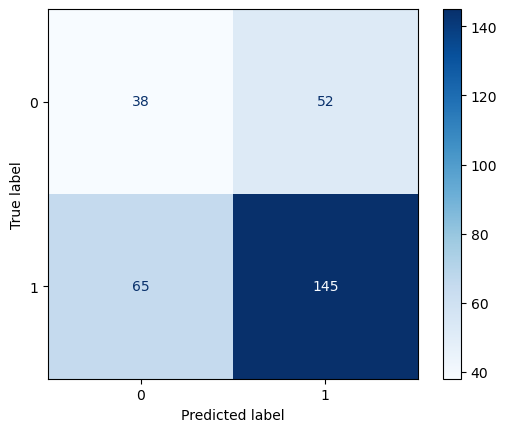

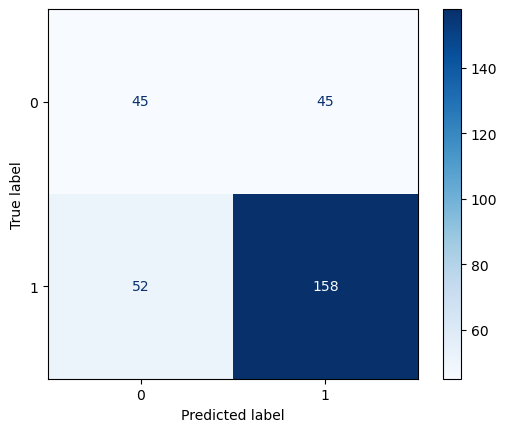

In [52]:
fit_predict_metrics(decision_tree,  smote=True,  X_train=X_TRAIN_RESAMPLED, y_train=Y_TRAIN_RESAMPLED, X_test=X_TEST, y_test=Y_TEST)
fit_predict_metrics(decision_tree,  smote=False, X_train=X_TRAIN, y_train=Y_TRAIN, X_test=X_TEST, y_test=Y_TEST)

### b) Random Forest


--- RandomForestClassifier Results ---
SMOTE applied: True
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        90
           1       0.75      0.84      0.79       210

    accuracy                           0.69       300
   macro avg       0.62      0.60      0.60       300
weighted avg       0.67      0.69      0.68       300


--- RandomForestClassifier Results ---
SMOTE applied: False
              precision    recall  f1-score   support

           0       0.51      0.31      0.39        90
           1       0.75      0.87      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.70      0.68       300



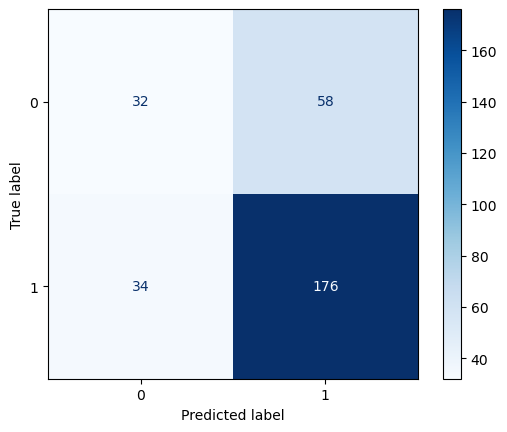

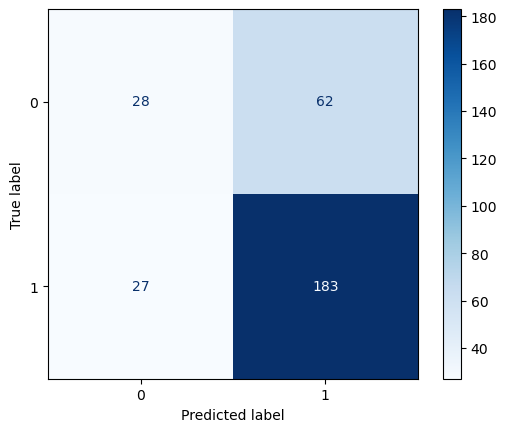

In [53]:
fit_predict_metrics(random_forest_model,  smote=True,  X_train=X_TRAIN_RESAMPLED, y_train=Y_TRAIN_RESAMPLED, X_test=X_TEST, y_test=Y_TEST)
fit_predict_metrics(random_forest_model,  smote=False, X_train=X_TRAIN, y_train=Y_TRAIN, X_test=X_TEST, y_test=Y_TEST)

### c) (XGBoost) Extreme Gradient Boosting


--- XGBClassifier Results ---
SMOTE applied: True


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:39:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.50      0.43      0.46        90
           1       0.77      0.81      0.79       210

    accuracy                           0.70       300
   macro avg       0.64      0.62      0.63       300
weighted avg       0.69      0.70      0.69       300


--- XGBClassifier Results ---
SMOTE applied: False
              precision    recall  f1-score   support

           0       0.46      0.40      0.43        90
           1       0.76      0.80      0.78       210

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.67      0.68      0.67       300



/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:39:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


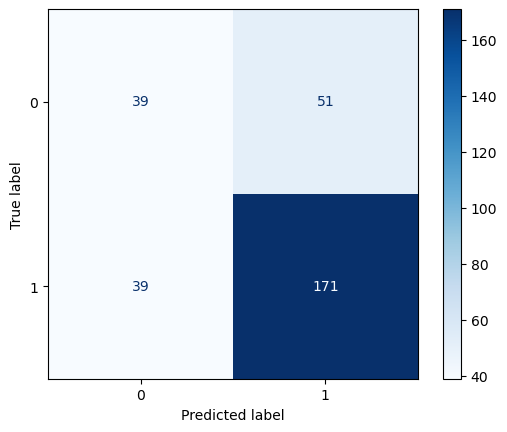

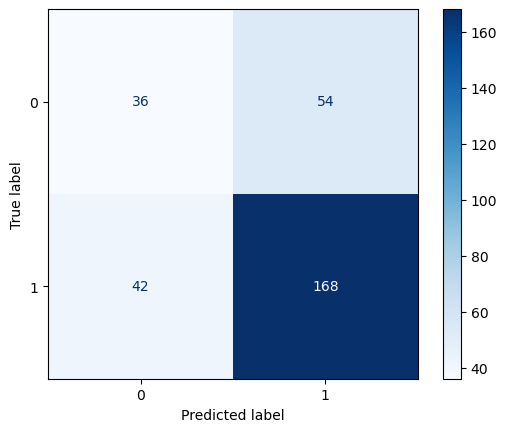

In [54]:
fit_predict_metrics(xgb_model, smote=True,  X_train=X_TRAIN_RESAMPLED, y_train=Y_TRAIN_RESAMPLED, X_test=X_TEST, y_test=Y_TEST)
fit_predict_metrics(xgb_model, smote=False, X_train=X_TRAIN, y_train=Y_TRAIN, X_test=X_TEST, y_test=Y_TEST)

# END